In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pingouin as pg
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from bioinfokit.analys import stat

In [3]:
import pandas as pd
import os
working_directory = os.getcwd()
print(working_directory)

/home/jovyan/SERAY-PULLUK-2178-MT


In [4]:
path = working_directory + '/diabetes.csv'
df = pd.read_csv(path)

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
18             1      103             30             38       83  43.3   
19             1      115             70             30       96  34.6   
20             3      126             88             41      235  39.3   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
23             9      119             80             35        0  29.0   
24            11      143             94             33      146  36.6   
25            10      125             70             26      115  31.1   
26             7      147             76              0        0  39.4   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
29             5      117             92              0        0  34.1   
30             5      109             75             26        0  36.0   
31             3      158             76             36      245  31.6   
32             3       88             58             11       54  24.8   
33             6       92             92              0        0  19.9   
34            10      122             78             31        0  27.6   
35             4      103             60             33      192  24.0   
36            11      138             76              0        0  33.2   
37             9      102             76             37        0  32.9   
38             2       90             68             42        0  38.2   
39             4      111             72             47      207  37.1   
40             3      180             64             25       70  34.0   
41             7      133             84              0        0  40.2   
42             7      106             92             18        0  22.7   
43             9      171            110             24      240  45.4   
44             7      159             64              0        0  27.4   
45             0      180             66             39        0  42.0   
46             1      146             56              0        0  29.7   
47             2       71             70             27        0  28.0   
48             7      103             66             32        0  39.1   
49             7      105              0              0        0   0.0   
50             1      103             80             11       82  19.4   
51             1      101             50             15       36  24.2   
52             5       88             66             21       23  24.4   
53       

In [7]:
#REPLACING MISSING VALUES WITH MEAN OF CORRESPONDING ATTRIBUTE VIS A VIS OUTCOME RESULT

In [8]:
df1 = df[df['Glucose'] != 0.0]
(Negative, Positive) = df1.groupby('Outcome')['Glucose'].mean()
print(Negative, Positive)
NegativeG = int('111')
PositiveG = int('142')

110.64386317907444 142.31954887218046


In [9]:
df.loc[(df['Glucose'] == 0) & (df['Outcome'] == 0),'Glucose']= NegativeG
df.loc[(df['Glucose'] == 0) & (df['Outcome'] == 1),'Glucose']= PositiveG

In [10]:
df1 = df[df['BloodPressure'] != 0.0]
(Negative, Positive) = df1.groupby('Outcome')['BloodPressure'].mean()
print(Negative, Positive)
NegativeBP = int('71')
PositiveBP = int('75')

70.87733887733887 75.32142857142857


In [11]:
df.loc[(df['BloodPressure'] == 0) & (df['Outcome'] == 0),'BloodPressure']=NegativeBP
df.loc[(df['BloodPressure'] == 0) & (df['Outcome'] == 1),'BloodPressure']=PositiveBP

In [12]:
df1 = df[df['SkinThickness'] != 0.0]
(Negative, Positive) = df1.groupby('Outcome')['SkinThickness'].mean()
print(Negative, Positive)
NegativeST = int('27')
PositiveST = int('33')

27.235457063711912 33.0


In [13]:
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 0),'SkinThickness']=NegativeST
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 1),'SkinThickness']=PositiveST

In [14]:
df1 = df[df['BMI'] != 0.0]
(Negative, Positive) = df1.groupby('Outcome')['BMI'].mean()
print(Negative, Positive)
NegativeBMI = int('31')
PositiveBMI = int('35')

30.859674134419553 35.40676691729323


In [15]:
df.loc[(df['BMI'] == 0) & (df['Outcome'] == 0),'BMI']=NegativeBMI
df.loc[(df['BMI'] == 0) & (df['Outcome'] == 1),'BMI']=PositiveBMI

In [16]:
df1 = df[df['DiabetesPedigreeFunction'] != 0.0]
(Negative, Positive) = df1.groupby('Outcome')['DiabetesPedigreeFunction'].mean()
print(Negative, Positive)
NegativeDPF = int(0.42)
PositiveDPF = int(0.55)

0.429734 0.5505


In [17]:
df.loc[(df['DiabetesPedigreeFunction'] == 0) & (df['Outcome'] == 0),'DiabetesPedigreeFunction']=NegativeDPF
df.loc[(df['DiabetesPedigreeFunction'] == 0) & (df['Outcome'] == 1),'DiabetesPedigreeFunction']=PositiveDPF

In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697917      72.424479      29.204427   79.799479   
std       3.369578   30.460951      12.104156       8.933982  115.244002   
min       0.000000   44.000000      24.000000       7.000000    0.000000   
25%       1.000000   99.750000      64.000000      25.000000    0.000000   
50%       3.000000  117.000000      72.000000      28.000000   30.500000   
75%       6.000000  141.000000      80.000000      33.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.447005                  0.471876   33.240885    0.348958  
std      6.878181                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [19]:
#GRAPHING ATTRIBUTES VIS A VIS OUTCOME

In [20]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Pregnancies", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

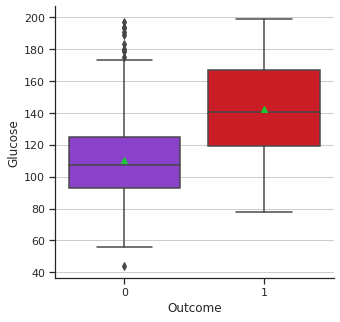

In [21]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Glucose", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

In [22]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="BloodPressure", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

In [23]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="SkinThickness", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

In [24]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Insulin", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

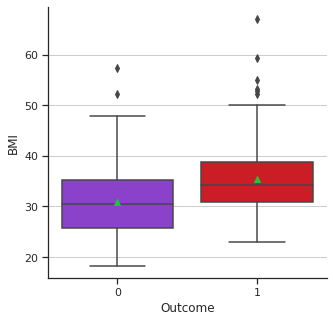

In [25]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="BMI", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

In [26]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

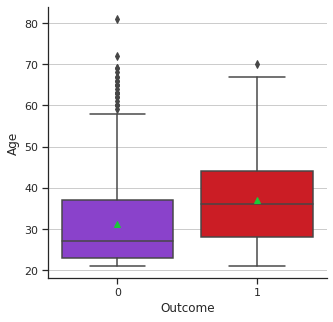

In [27]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Age", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


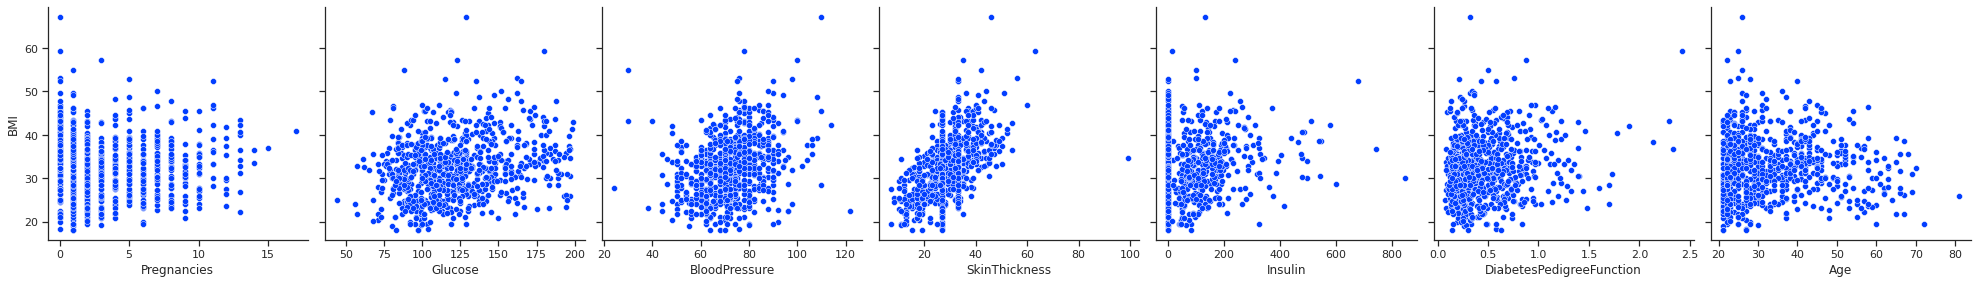

In [28]:
sns.pairplot(df, x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'], 
             y_vars='BMI', size=4, aspect=1, kind='scatter')
plt.show()

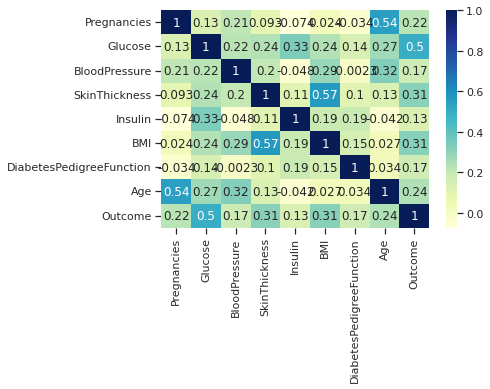

In [29]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#Shows Pregnancies column seems most correlated to Age.
#Shows Glucose column seems most correlated to Outcome.
#Shows SkinThickness column seems most correlated to BMI.

In [569]:
#SHAPIRO TO TEST NORMALITY
#H0: Normal distribution

In [136]:
Pregnancies = stats.shapiro(df['Pregnancies'])
Pregnancies
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)

In [137]:
Pregnancies = stats.shapiro(df['Glucose'])
Pregnancies
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.9699165225028992, pvalue=1.791234001402575e-11)

In [138]:
BloodPressure = stats.shapiro(df['BloodPressure'])
BloodPressure
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.988545835018158, pvalue=1.04419141280232e-05)

In [139]:
SkinThickness = stats.shapiro(df['SkinThickness'])
SkinThickness
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.9528657793998718, pvalue=5.806819546825279e-15)

In [140]:
Insulin = stats.shapiro(df['Insulin'])
Insulin
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.7220207452774048, pvalue=7.915248149269491e-34)

In [141]:
BMI = stats.shapiro(df['BMI'])
BMI
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.9794162511825562, pvalue=6.317857348392408e-09)

In [142]:
DiabetesPedigreeFunction = stats.shapiro(df['DiabetesPedigreeFunction'])
DiabetesPedigreeFunction
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.8365186452865601, pvalue=2.477696547502535e-27)

In [143]:
Age = stats.shapiro(df['Age'])
Age
#Fail to reject H0 as pvalue is not smaller than 0.05

ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)

In [538]:
#T TESTS
#H0: Means of attributes are equal

In [145]:
from scipy import stats as st
from bioinfokit.analys import get_data
from bioinfokit.analys import stat

In [147]:
a = df.loc[df['Outcome'] == 1, 'Pregnancies'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'Pregnancies'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)

In [148]:
a = df.loc[df['Outcome'] == 1, 'Glucose'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'Glucose'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=15.80518647597041, pvalue=6.51636298616489e-49)

In [149]:
a = df.loc[df['Outcome'] == 1, 'BloodPressure'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'BloodPressure'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=4.895412347142839, pvalue=1.196735416434975e-06)

In [150]:
a = df.loc[df['Outcome'] == 1, 'SkinThickness'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'SkinThickness'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=9.064359644758413, pvalue=1.0317595350130737e-18)

In [151]:
a = df.loc[df['Outcome'] == 1, 'Insulin'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'Insulin'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Reject H0 as pvalue is smaller than 0.05

Ttest_indResult(statistic=3.64432538765356, pvalue=0.00028618646036031987)

In [152]:
a = df.loc[df['Outcome'] == 1, 'BMI'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'BMI'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=9.183265899164367, pvalue=3.833801674302277e-19)

In [153]:
a = df.loc[df['Outcome'] == 1, 'DiabetesPedigreeFunction'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'DiabetesPedigreeFunction'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=4.88582646072744, pvalue=1.254607010148809e-06)

In [154]:
a = df.loc[df['Outcome'] == 1, 'Age'].to_numpy()
b = df.loc[df['Outcome'] == 0, 'Age'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
#Fail to reject H0 as pvalue is not smaller than 0.05

Ttest_indResult(statistic=6.792688071649956, pvalue=2.2099754606654358e-11)

In [ ]:
#Binning Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

In [32]:
min_value = df['Pregnancies'].min()
max_value = df['Pregnancies'].max()
print(min_value)
print(max_value)

0
17


In [33]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 0.  ,  4.25,  8.5 , 12.75, 17.  ])

In [34]:
labels = ['0-4','5-9','10-13','13-17']
df['PregnanciesGroups'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels, include_lowest=True)

In [35]:
min_value = df['Glucose'].min()
max_value = df['Glucose'].max()
print(min_value)
print(max_value)

44
199


In [36]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 44.  ,  82.75, 121.5 , 160.25, 199.  ])

In [37]:
labels = ['44-83','84-122','123-160','161-199']
df['GlucoseGroups'] = pd.cut(df['Glucose'], bins=bins, labels=labels, include_lowest=True)

In [38]:
min_value = df['BloodPressure'].min()
max_value = df['BloodPressure'].max()
print(min_value)
print(max_value)

24
122


In [39]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 24. ,  48.5,  73. ,  97.5, 122. ])

In [40]:
labels = ['24-49','50-73','74-98','99-122']
df['BloodPressureGroups'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels, include_lowest=True)

In [41]:
min_value = df['SkinThickness'].min()
max_value = df['SkinThickness'].max()
print(min_value)
print(max_value)

7
99


In [42]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 7., 30., 53., 76., 99.])

In [43]:
labels = ['7-30','31-53','54-76','77-99']
df['SkinThicknessGroups'] = pd.cut(df['SkinThickness'], bins=bins, labels=labels, include_lowest=True)

In [44]:
min_value = df['Insulin'].min()
max_value = df['Insulin'].max()
print(min_value)
print(max_value)

0
846


In [45]:
bins = np.linspace(min_value,max_value,5)
bins

array([  0. , 211.5, 423. , 634.5, 846. ])

In [46]:
labels = ['0-212','213-423','424-635','636-846']
df['InsulinGroups'] = pd.cut(df['Insulin'], bins=bins, labels=labels, include_lowest=True)

In [47]:
min_value = df['BMI'].min()
max_value = df['BMI'].max()
print(min_value)
print(max_value)

18.2
67.1


In [48]:
bins = np.linspace(min_value,max_value,5)
bins

array([18.2  , 30.425, 42.65 , 54.875, 67.1  ])

In [49]:
labels = ['18-30', '31-43', '44-55','56-67']
df['BMIGroups'] = pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=True)

In [50]:
min_value = df['DiabetesPedigreeFunction'].min()
max_value = df['DiabetesPedigreeFunction'].max()
print(min_value)
print(max_value)

0.078
2.42


In [51]:
bins = np.linspace(min_value,max_value,5)
bins

array([0.078 , 0.6635, 1.249 , 1.8345, 2.42  ])

In [52]:
labels = ['0.078-0.6635','0.6636-1.249','1.250-1.8345','1.8346-2.42']
df['DiabetesPedigreeFunctionGroups'] = pd.cut(df['DiabetesPedigreeFunction'], bins=bins, labels=labels, include_lowest=True)

In [53]:
min_value = df['Age'].min()
max_value = df['Age'].max()
print(min_value)
print(max_value)

21
81


In [54]:
bins = np.linspace(min_value,max_value,5)
bins

array([21., 36., 51., 66., 81.])

In [55]:
labels = ['21-36','37-51','52-66','67-81']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
#ONE WAY ANOVA
#Dependent Variable: BMI
#Independent Variable: all other attributes

In [ ]:
#BMI-Glucose

Source             SS   DF           MS          F         p-unc  \
0  BMIGroups   29325.633071    3  9775.211024  10.944908  4.819751e-07   
1     Within  682350.283595  764   893.128643        NaN           NaN   

        np2  
0  0.041206  
1       NaN

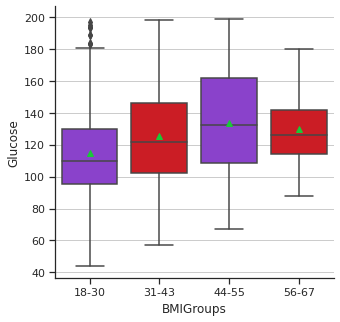

In [65]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="Glucose", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='Glucose', between='BMIGroups', data=df,
               detailed=True)
aov

In [66]:
#BMI-Pregnancies

Source           SS   DF         MS         F     p-unc       np2
0  BMIGroups    95.177210    3  31.725737  2.814046  0.038406  0.010929
1     Within  8613.383988  764  11.274063       NaN       NaN       NaN

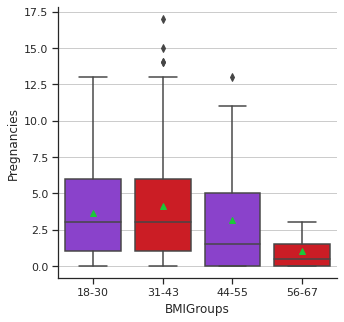

In [67]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="Pregnancies", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='Pregnancies', between='BMIGroups', data=df,
               detailed=True)
aov

In [68]:
#BMI-BloodPressure

Source             SS   DF           MS          F         p-unc  \
0  BMIGroups    7130.816156    3  2376.938719  17.255158  7.533547e-11   
1     Within  105242.803635  764   137.752361        NaN           NaN   

        np2  
0  0.063456  
1       NaN

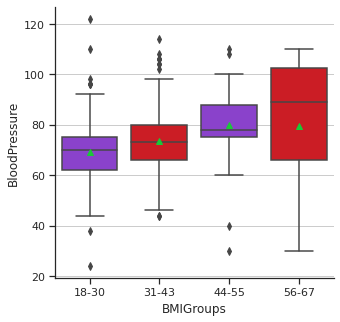

In [69]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="BloodPressure", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='BloodPressure', between='BMIGroups', data=df,
               detailed=True)
aov

In [70]:
#BMI-SkinThickness

Source            SS   DF           MS          F         p-unc  \
0  BMIGroups  15942.769199    3  5314.256400  89.673993  1.011960e-49   
1     Within  45276.135749  764    59.261958        NaN           NaN   

        np2  
0  0.260422  
1       NaN

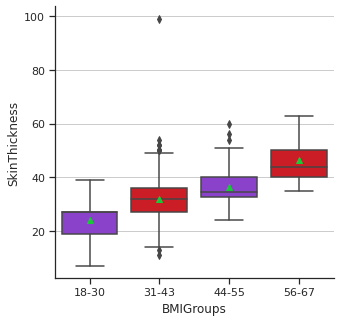

In [71]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="SkinThickness", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='SkinThickness', between='BMIGroups', data=df,
               detailed=True)
aov

In [72]:
#BMI-Insulin

Source            SS   DF            MS         F     p-unc       np2
0  BMIGroups  2.496827e+05    3  83227.553340  6.398909  0.000277  0.024511
1     Within  9.936982e+06  764  13006.521544       NaN       NaN       NaN

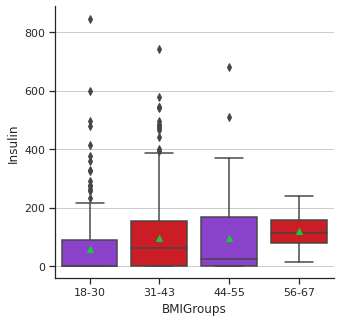

In [73]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="Insulin", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='Insulin', between='BMIGroups', data=df,
               detailed=True)
aov

In [74]:
#BMI-DiabetesPedigreeFunction

Source         SS   DF        MS         F    p-unc       np2
0  BMIGroups   2.187473    3  0.729158  6.792561  0.00016  0.025979
1     Within  82.012742  764  0.107347       NaN      NaN       NaN

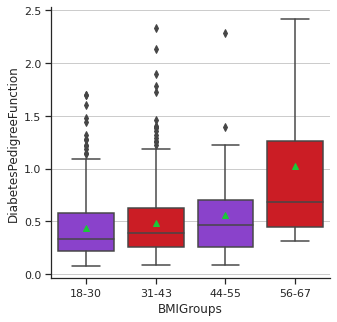

In [75]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="DiabetesPedigreeFunction", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='DiabetesPedigreeFunction', between='BMIGroups', data=df,
               detailed=True)
aov

In [76]:
#BMI-Age

Source             SS   DF          MS         F     p-unc       np2
0  BMIGroups     508.657392    3  169.552464  1.227038  0.298804  0.004795
1     Within  105569.778806  764  138.180339       NaN       NaN       NaN

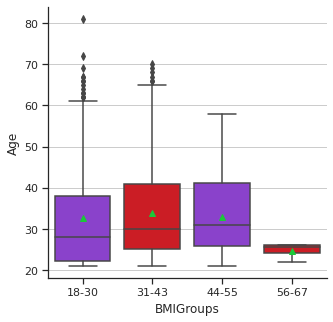

In [77]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="BMIGroups", y="Age", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

aov = pg.anova(dv='Age', between='BMIGroups', data=df,
               detailed=True)
aov

In [ ]:
#POST-HOC for interest areas (smalest p, biggest c)

In [75]:
df.pairwise_tukey(dv='Pregnancies', between='BMIGroups', effsize = 'cohen')
#no significance

A      B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0  18-30  31-43  3.674194  4.109137 -0.434944  0.254916 -1.706221  0.321077   
1  18-30  44-55  3.674194  3.183333  0.490860  0.473570  1.036509  0.728032   
2  18-30  56-67  3.674194  1.000000  2.674194  1.689640  1.582700  0.389109   
3  31-43  44-55  4.109137  3.183333  0.925804  0.465312  1.989640  0.192742   
4  31-43  56-67  4.109137  1.000000  3.109137  1.687344  1.842622  0.254182   
5  44-55  56-67  3.183333  1.000000  2.183333  1.733902  1.259202  0.589274   

      cohen  
0 -0.129537  
1  0.146190  
2  0.796439  
3  0.275727  
4  0.925976  
5  0.650249

In [76]:
df.pairwise_tukey(dv='BMI', between='PregnanciesGroups', effsize = 'cohen')
#significance between [0-4,5-9] and [5-9,10-13]

A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0    0-4    5-9  32.205488  32.644737 -0.439249  0.587080 -0.748193  0.877441   
1    0-4  10-13  32.205488  32.965278 -0.759790  0.867271 -0.876070  0.817271   
2    0-4  13-17  32.205488  35.585714 -3.380226  1.862915 -1.814483  0.267221   
3    5-9  10-13  32.644737  32.965278 -0.320541  0.951200 -0.336986  0.986815   
4    5-9  13-17  32.644737  35.585714 -2.940977  1.903437 -1.545088  0.411040   
5  10-13  13-17  32.965278  35.585714 -2.620437  2.007628 -1.305240  0.559839   

      cohen  
0 -0.063907  
1 -0.110543  
2 -0.491792  
3 -0.046636  
4 -0.427885  
5 -0.381250

In [77]:
df.pairwise_tukey(dv='Glucose', between='BMIGroups', effsize = 'cohen')
#between [18-30,31-43] and [18-30, 44-55]

A      B     mean(A)     mean(B)       diff         se         T  \
0  18-30  31-43  114.632258  125.393401 -10.761143   2.268895 -4.742901   
1  18-30  44-55  114.632258  133.383333 -18.751075   4.215037 -4.448615   
2  18-30  56-67  114.632258  130.000000 -15.367742  15.038724 -1.021878   
3  31-43  44-55  125.393401  133.383333  -7.989932   4.141534 -1.929221   
4  31-43  56-67  125.393401  130.000000  -4.606599  15.018288 -0.306733   
5  44-55  56-67  133.383333  130.000000   3.383333  15.432681  0.219232   

    p-tukey     cohen  
0  0.000015 -0.360082  
1  0.000059 -0.627436  
2  0.736675 -0.514225  
3  0.216625 -0.267354  
4  0.989984 -0.154143  
5  0.996280  0.113211

In [78]:
df.pairwise_tukey(dv='BMI', between='GlucoseGroups', effsize = 'cohen')
#no significance

A        B    mean(A)    mean(B)      diff        se         T  \
0    44-83   84-122  30.356863  31.195968 -0.839105  1.000306 -0.838848   
1    44-83  123-160  30.356863  33.561885 -3.205023  1.031455 -3.107283   
2    44-83  161-199  30.356863  35.416832 -5.059969  1.150788 -4.396961   
3   84-122  123-160  31.195968  33.561885 -2.365918  0.551878 -4.287029   
4   84-122  161-199  31.195968  35.416832 -4.220864  0.751653 -5.615439   
5  123-160  161-199  33.561885  35.416832 -1.854946  0.792635 -2.340228   

        p-tukey     cohen  
0  8.359224e-01 -0.125256  
1  1.053738e-02 -0.478423  
2  7.385526e-05 -0.755316  
3  1.199608e-04 -0.353167  
4  1.643462e-07 -0.630060  
5  8.997588e-02 -0.276893

In [79]:
df.pairwise_tukey(dv='SkinThickness', between='BMIGroups', effsize = 'cohen')
#no significance

A      B    mean(A)    mean(B)       diff        se          T  \
0  18-30  31-43  23.970968  32.063452  -8.092484  0.584447 -13.846388   
1  18-30  44-55  23.970968  36.316667 -12.345699  1.085756 -11.370598   
2  18-30  56-67  23.970968  46.500000 -22.529032  3.873843  -5.815681   
3  31-43  44-55  32.063452  36.316667  -4.253215  1.066823  -3.986806   
4  31-43  56-67  32.063452  46.500000 -14.436548  3.868579  -3.731745   
5  44-55  56-67  36.316667  46.500000 -10.183333  3.975322  -2.561637   

        p-tukey     cohen  
0  1.985079e-13 -1.051221  
1  1.985079e-13 -1.603717  
2  5.316551e-08 -2.926541  
3  4.259017e-04 -0.552496  
4  1.168185e-03 -1.875320  
5  5.174613e-02 -1.322824

In [80]:
df.pairwise_tukey(dv='BMI', between='SkinThicknessGroups', effsize = 'cohen')
#no significance

A      B    mean(A)    mean(B)       diff        se          T  \
0   7-30  31-53  29.555656  36.194375  -6.638719  0.435695 -15.237088   
1   7-30  54-76  29.555656  47.760000 -18.204344  2.669615  -6.819091   
2   7-30  77-99  29.555656  34.700000  -5.144344  5.942671  -0.865662   
3  31-53  54-76  36.194375  47.760000 -11.565625  2.675301  -4.323112   
4  31-53  77-99  36.194375  34.700000   1.494375  5.945228   0.251357   
5  54-76  77-99  47.760000  34.700000  13.060000  6.502518   2.008453   

        p-tukey     cohen  
0  1.985079e-13 -1.118390  
1  1.119124e-10 -3.066790  
2  8.225746e-01 -0.866641  
3  1.024312e-04 -1.948400  
4  9.944243e-01  0.251750  
5  1.856943e-01  2.200150

In [ ]:
#LINEAR REGRESSION

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
x = df['Pregnancies'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.0005672827870107922

In [58]:
x = df['Glucose'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.05525952982849458

In [59]:
x = df['BloodPressure'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.08177437391843345

In [60]:
x = df['SkinThickness'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.3212433017048928

In [61]:
x = df['Insulin'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.034420479271800586

In [62]:
x = df['DiabetesPedigreeFunction'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.0233035377766434

In [63]:
x = df['Age'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.000748427221234027

In [787]:
#MULTIPLE LINEAR REGRESSION

In [60]:
attributes = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [64]:
for s in attributes:
    x = df[s].array.reshape(-1,1)
    y = df['BMI'].array.reshape(-1,1)

In [65]:
x = df[['Pregnancies', 'Glucose', 'Age', 'BloodPressure', 'SkinThickness', 'Insulin', 
          'DiabetesPedigreeFunction','Outcome']]
y = df['BMI']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=None)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

dfattributes = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfattributes

Actual  Predicted
167    29.6  30.273015
422    40.6  38.054783
470    41.3  37.352177
213    42.6  32.939237
159    40.9  37.443011
125    55.0  33.945726
737    32.0  28.359361
158    29.0  28.704228
523    34.2  33.757920
205    23.9  31.211031
346    28.7  25.921647
304    21.0  30.632399
372    35.8  29.124844
76     32.6  30.479338
353    27.2  24.827630
184    27.6  30.153874
537    21.7  27.153273
35     24.0  33.016575
44     27.4  28.815518
536    29.6  31.883662
214    34.2  36.163755
718    35.5  37.850243
607    19.5  29.447275
476    33.7  42.115884
50     19.4  27.080538
337    31.2  34.402966
586    34.9  32.979421
183    26.8  29.063637
581    25.0  29.013604
553    29.9  29.152755
96     31.6  29.909644
599    23.1  24.151657
179    39.1  36.372548
190    22.6  29.741407
275    40.5  40.756484
269    27.5  35.417942
385    22.3  23.836212
175    32.7  38.988293
630    27.4  33.870685
288    20.8  25.403337
709    38.0  35.382163
57     46.8  46.395886
382    25.4  24.634978
246    31.2  29.010729
619    32.4  35.612809
103    26.6  27.957171
683    32.3  36.333625
404    32.9  32.918221
479    28.0  31.837239
267    40.0  36.528114
31     31.6  38.897841
325    25.6  29.844801
569    34.3  33.875900
330    23.1  27.721677
665    34.8  39.543039
130    29.7  28.584481
251    28.0  32.421847
118    28.2  28.209964
648    28.3  36.796521
141    39.5  32.360706
252    24.4  27.534937
402    35.0  39.525180
249    30.1  29.837448
458    37.6  42.611490
344    36.8  28.768782
46     29.7  29.083855
180    23.2  31.076159
0      33.6  34.571035
256    30.1  33.285939
115    31.2  35.667789
734    23.3  29.809557
717    23.1  25.536631
763    32.9  37.357608
37     32.9  35.905319
587    24.3  29.691764
742    28.5  26.751616
566    38.6  32.635703
456    26.7  26.757988
563    26.9  26.383541
677    35.3  29.465185
391    45.7  35.623996
449    30.5  28.352824
108    34.3  30.724587
500    25.2  31.098020
441    32.2  29.432104
507    28.6  29.852546
672    35.5  32.269378
492    32.8  33.719553
309    32.9  34.531078
198    34.8  39.432419
51     24.2  24.172950
601    23.7  30.321041
181    34.9  27.952304
347    23.5  30.829208
751    39.0  36.498591
432    30.0  26.164804
682    44.6  35.409628
73     35.1  31.924737
19     34.6  34.332472
431    30.4  27.062388
716    33.8  39.847961
527    26.3  27.290264
276    26.5  29.842895
493    28.9  29.781989
603    35.2  33.695482
427    34.1  33.592846
615    25.8  30.696675
691    42.3  38.902069
272    23.0  30.691755
758    37.5  31.361375
306    25.5  30.149802
756    32.0  37.477612
371    31.0  31.068199
416    27.2  29.391512
356    33.3  36.689359
383    25.1  27.872410
377    37.2  34.064903
418    18.2  30.711216
197    22.9  27.366950
216    35.8  37.826940
429    35.0  33.458012
152    34.3  35.824682
8      30.5  41.023861
93     23.8  32.834285
401    24.2  27.275538
469    46.1  37.908161
543    39.5  31.881901
614    36.1  32.083924
571    22.6  34.348969
320    27.5  25.177657
322    27.4  29.504738
671    25.4  23.480990
688    24.1  32.871666
760    28.4  29.612391
442    33.2  30.631495
242    25.6  33.236346
604    28.4  34.830972
496    26.0  29.993073
637    31.6  29.102467
222    25.2  29.742410
311    39.4  36.012830
17     29.6  34.795456
284    27.0  34.419803
99     49.7  45.311702
291    36.6  33.919719
238    30.8  32.255946
211    42.8  42.967758
575    35.5  35.224372
598    36.8  34.550060
713    26.4  28.922664
640    29.3  30.167165
357    39.9  33.072353
695    30.4  35.719278
265    33.6  27.786313

In [805]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, y_pred)

4.420355373796612

In [806]:
#Mean Squared Error
metrics.mean_squared_error(y_test, y_pred)

32.83234508946965

In [808]:
#Root Mean Square Error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.729951578283157

In [65]:
attributes = ['Pregnancies','Glucose','SkinThickness','Outcome']

In [66]:
for s in attributes:
    x = df[s].array.reshape(-1,1)
    y = df['BMI'].array.reshape(-1,1)

In [68]:
x = df[['Pregnancies','Glucose','SkinThickness','Outcome']]
y = df['BMI']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=None)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

dfattributes = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfattributes

Actual  Predicted
709    38.0  35.032333
608    41.5  36.598560
179    39.1  35.317040
381    20.0  29.194472
255    33.6  36.726915
745    30.0  30.864306
196    24.3  30.953231
20     39.3  36.358109
675    30.9  36.049582
194    24.4  26.376183
288    20.8  26.219345
502    39.0  38.436538
648    28.3  34.893108
490    36.8  30.810023
511    22.1  27.715407
614    36.1  31.365995
541    32.4  32.560601
680    24.2  30.415607
27     23.2  26.094595
754    32.4  34.621547
9      35.0  34.593062
426    31.0  31.009522
109    37.4  32.729474
590    46.8  36.503646
326    35.1  35.672945
594    33.6  37.243938
234    29.7  30.461572
767    30.4  32.358526
278    24.9  30.216787
624    30.8  30.780076
665    34.8  38.168146
200    31.0  26.940450
265    33.6  26.397513
292    43.3  37.519352
701    27.6  34.236725
281    35.9  29.746159
29     34.1  30.260611
611    32.9  32.047127
100    39.0  36.667021
630    27.4  34.649353
271    25.2  32.755815
509    25.0  29.653497
505    33.3  28.562178
72     43.4  33.522774
632    26.2  30.823900
447    36.5  38.136788
666    32.5  29.825924
557    27.8  29.507417
395    27.7  29.872186
761    44.0  34.243149
547    33.1  28.311216
104    39.6  30.444092
488    25.6  26.263169
482    27.8  28.034395
419    26.4  34.155799
603    35.2  33.594651
504    37.3  35.129573
164    31.6  36.416544
343    34.7  30.333651
649    26.4  30.409131
211    42.8  42.452734
531    45.3  31.199427
613    32.5  30.263483
198    34.8  39.573875
229    45.2  32.926097
448    33.6  37.602718
558    46.2  33.891143
517    37.6  29.943517
414    34.6  37.309095
92     46.7  34.437683
668    34.0  32.136965
142    32.5  30.384929
429    35.0  32.512494
449    30.5  27.833002
112    31.2  33.485537
282    32.4  25.318609
266    36.3  36.518800
559    30.1  28.491279
273    33.2  39.544955
726    36.1  31.904215
564    32.4  30.965698
673    57.3  33.943399
682    44.6  35.765902
738    36.6  26.697127
354    42.7  30.300153
553    29.9  29.519452
626    24.7  31.462371
535    32.9  35.563235
61     32.9  34.709926
615    25.8  30.533881
463    27.6  31.022421
150    37.4  40.494476
178    45.0  30.640420
289    36.1  36.451501
397    34.3  39.182577
646    23.4  30.403091
129    27.9  36.036735
492    32.8  34.561270
372    35.8  28.887704
21     35.4  29.346729
654    34.2  31.362987
404    32.9  35.872145
123    26.8  30.479731
503    33.3  28.700373
385    22.3  25.625676
396    24.7  33.153834
606    40.0  40.486295
158    29.0  27.326734
510    29.7  32.335921
640    29.3  27.174910
88     37.1  32.839749
568    31.3  31.808382
576    24.0  27.146126
19     34.6  34.780393
38     38.2  38.939985
434    24.5  23.226305
392    23.7  26.196120
113    34.0  29.878661
348    21.8  27.270444
49     31.0  29.651356
321    31.6  34.302611
84     48.8  35.419296
360    31.2  36.178913
543    39.5  28.414935
549    28.5  33.109958
155    50.0  39.551082
583    38.7  29.361337
662    37.6  40.343519
204    37.7  31.814858
214    34.2  33.791031
439    36.8  29.897552
525    21.8  26.700000
171    35.4  31.207016
749    24.3  35.567517
208    33.2  30.821759
128    34.5  32.438723
141    39.5  31.285366
565    26.1  25.453252
529    24.6  31.257859
637    31.6  27.019235
345    38.5  33.297475
694    23.5  30.517132
625    37.7  37.986127
306    25.5  30.733516
268    25.1  31.126386
8      30.5  41.688487
436    37.4  31.448627
422    40.6  38.634192
489    26.1  30.734491
476    33.7  40.344549
752    26.0  29.377654
457    30.2  30.202910
207    37.7  35.784496
616    28.7  30.043632

In [72]:
metrics.mean_absolute_error(y_test, y_pred)

4.625740683612161

In [73]:
metrics.mean_squared_error(y_test, y_pred)

34.62490981204363

In [74]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.884293484526722

In [ ]:
#TWO WAY ANOVAS - pregnancies, glucose, skinthickness

df       sum_sq     mean_sq          F  \
C(BMIGroups)               3.0   126.854636   42.284879   3.981708   
C(Outcome)                 1.0   460.476446  460.476446  43.360250   
C(BMIGroups):C(Outcome)    3.0    81.872409   27.290803   2.569808   
Residual                 760.0  8071.035134   10.619783        NaN   

                               PR(>F)  
C(BMIGroups)             7.878428e-03  
C(Outcome)               8.493038e-11  
C(BMIGroups):C(Outcome)  5.321356e-02  
Residual                          NaN

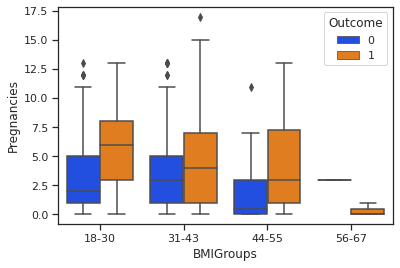

In [85]:
sns.boxplot(x="BMIGroups", y='Pregnancies', hue = 'Outcome', data=df)

res = stat()
res.anova_stat(df=df, res_var='Pregnancies', 
               anova_model='Pregnancies~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')
res.anova_summary

In [87]:
res = stat()
res.tukey_hsd(df=df, res_var='Pregnancies', xfac_var = 'Outcome',
              anova_model='Pregnancies~C(Outcome) + C(BMIGroups) + C(Outcome):C(BMIGroups)')
print(res.tukey_summary)

res = stat()
res.tukey_hsd(df=df, res_var='Pregnancies', xfac_var = 'BMIGroups',
              anova_model='Pregnancies~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')

print(res.tukey_summary)

#no statistical difference for BMI groups

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  1.567672  1.083358  2.051985  8.986365    0.001
  group1 group2      Diff     Lower     Upper   q-value   p-value
0  31-43  18-30  0.434944 -0.202074  1.071962  2.486180  0.294814
1  31-43  44-55  0.925804 -0.236979  2.088586  2.899158  0.170956
2  31-43  56-67  3.109137 -1.107418  7.325692  2.684934  0.229624
3  18-30  44-55  0.490860 -0.692559  1.674280  1.510326  0.685903
4  18-30  56-67  2.674194 -1.548099  6.896486  2.306195  0.362566
5  44-55  56-67  2.183333 -2.149567  6.516234  1.834817  0.557196


df         sum_sq        mean_sq           F  \
C(BMIGroups)               3.0    2881.605458     960.535153    1.368759   
C(Outcome)                 1.0  148569.506009  148569.506009  211.710940   
C(BMIGroups):C(Outcome)    3.0     445.918499     148.639500    0.211811   
Residual                 760.0  533334.859087     701.756394         NaN   

                               PR(>F)  
C(BMIGroups)             2.510834e-01  
C(Outcome)               1.719233e-42  
C(BMIGroups):C(Outcome)  8.882400e-01  
Residual                          NaN

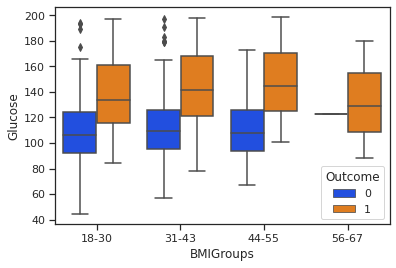

In [88]:
sns.boxplot(x="BMIGroups", y='Glucose', hue = 'Outcome', data=df)

res = stat()
res.anova_stat(df=df, res_var='Glucose', 
               anova_model='Glucose~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')
res.anova_summary

In [89]:
res = stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var = 'Outcome',
              anova_model='Glucose~C(Outcome) + C(BMIGroups) + C(Outcome):C(BMIGroups)')
print(res.tukey_summary)

res = stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var = 'BMIGroups',
              anova_model='Glucose~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')

print(res.tukey_summary)

#statistical difference for 31-43 & 18-30 and 18-30 & 44-55 BMI groups

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2       Diff      Lower     Upper    q-value  p-value
0       1       0  31.671164  27.734198  35.60813  22.333543    0.001
  group1 group2       Diff      Lower      Upper   q-value   p-value
0  31-43  18-30  10.761143   5.582845  15.939441  7.566984  0.001000
1  31-43  44-55   7.989932  -1.462289  17.442154  3.077944  0.130576
2  31-43  56-67   4.606599 -29.669638  38.882836  0.489372  0.900000
3  18-30  44-55  18.751075   9.131097  28.371054  7.097470  0.001000
4  18-30  56-67  15.367742 -18.955135  49.690619  1.630339  0.638301
5  44-55  56-67   3.383333 -31.838671  38.605338  0.349770  0.900000


df        sum_sq      mean_sq          F  \
C(BMIGroups)               3.0  11786.247089  3928.749030  69.260584   
C(Outcome)                 1.0   1773.832838  1773.832838  31.271200   
C(BMIGroups):C(Outcome)    3.0    391.934967   130.644989   2.303163   
Residual                 760.0  43110.367944    56.724168        NaN   

                               PR(>F)  
C(BMIGroups)             1.331993e-39  
C(Outcome)               3.130524e-08  
C(BMIGroups):C(Outcome)  7.572906e-02  
Residual                          NaN

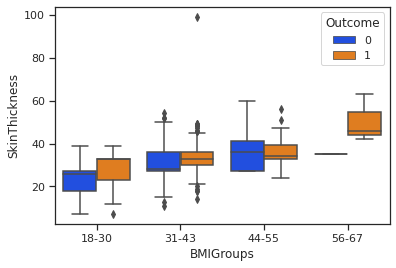

In [90]:
sns.boxplot(x="BMIGroups", y='SkinThickness', hue = 'Outcome', data=df)

res = stat()
res.anova_stat(df=df, res_var='SkinThickness', 
               anova_model='SkinThickness~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')
res.anova_summary

In [91]:
res = stat()
res.tukey_hsd(df=df, res_var='SkinThickness', xfac_var = 'Outcome',
              anova_model='SkinThickness~C(Outcome) + C(BMIGroups) + C(Outcome):C(BMIGroups)')
print(res.tukey_summary)

res = stat()
res.tukey_hsd(df=df, res_var='SkinThickness', xfac_var = 'BMIGroups',
              anova_model='SkinThickness~C(BMIGroups) + C(Outcome) + C(BMIGroups):C(Outcome)')

print(res.tukey_summary)

#statistical difference for all  BMI groups

   group1  group2  Diff     Lower     Upper    q-value  p-value
0       1       0  5.83  4.710684  6.949316  14.460099    0.001
  group1 group2       Diff      Lower      Upper    q-value   p-value
0  31-43  18-30   8.092484   6.620246   9.564722  20.014991  0.001000
1  31-43  44-55   4.253215   1.565862   6.940568   5.762940  0.001000
2  31-43  56-67  14.436548   4.691500  24.181597   5.394247  0.001000
3  18-30  44-55  12.345699   9.610651  15.080747  16.436230  0.001000
4  18-30  56-67  22.529032  12.770723  32.287341   8.406583  0.001000
5  44-55  56-67  10.183333   0.169394  20.197273   3.702853  0.044546


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
